<a href="https://colab.research.google.com/github/fridayyy3000/mini-project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing_image_downloader

!mkdir images 

from bing_image_downloader import downloader
downloader.download("super cars",limit =30,output_dir='images',adult_filter_off=True)

from bing_image_downloader import downloader
downloader.download("beautiful sunflowers",limit =30,output_dir='images',adult_filter_off=True)

from bing_image_downloader import downloader
downloader.download("UEFA Soccer Ball",limit =30,output_dir='images',adult_filter_off=True)

from bing_image_downloader import downloader
downloader.download("ice cream cone",limit =30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://carsoid.com/wp-content/uploads/2018/03/Best-Looking-Blacked-Out-Supercars.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://digitalsynopsis.com/wp-content/uploads/2014/06/supercar-wallpapers-gumpert-apollo-3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://pictures.topspeed.com/IMG/jpg/201406/1967-toyota-2000-gt-7.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.supercars.net/blog/wp-content/uploads/2020/10/2020-Bugatti-Bolide-Concept-002-2160-scaled.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://wallpapershome.com/images/wallpapers/lamborghini-egoista-1080x1920-supercar-concept-lamborghini-sports-car-2215.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://wallpapershome.com/images/wallpapers/mclaren-720s-1920x1080-supercar-2019-cars-4k-20157.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://4kw

In [ ]:
# processing
# 1. resizise
# 2. flatten


import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['super cars', 'UEFA Soccer Ball','ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #label encoding values
  path = os.path.join(DATADIR,category) # create path to use all images

  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    # plt.imshow(img_array)
    img_resize = resize(img_array,(150,150,3))  # Normalises the value from 0 to 1
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)



In [ ]:
# split data from training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)


from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train) 



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

y_test



array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix 
accuracy_score(y_test,y_pred)


confusion_matrix(y_pred,y_test)



array([[ 8,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  6]])

In [ ]:
# save the modle using pickle library

import pickle
pickle.dump(clf,open('img_model.p','wb'))



Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg/220px-Strawberry_ice_cream_cone_%285076899310%29.jpg
(331, 220, 3)
PREDICTED OUTPUT:ice cream cone


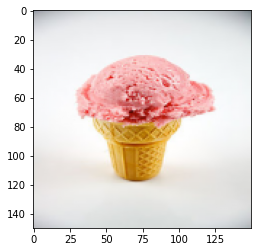

In [ ]:
model = pickle.load(open('img_model.p','rb'))

# testing a brand new image

flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')